In [1]:
# Initial setup & package imports

%matplotlib widget
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs

In [2]:
# Input/output options
args = WorkflowInputs(
    images=["FLIR0077.csv"],
            names="image1",
            result="",
            outdir=".",
            writeimg=True,
            debug="plot")

In [3]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
pcv.params.text_size = 20
pcv.params.text_thickness = 20

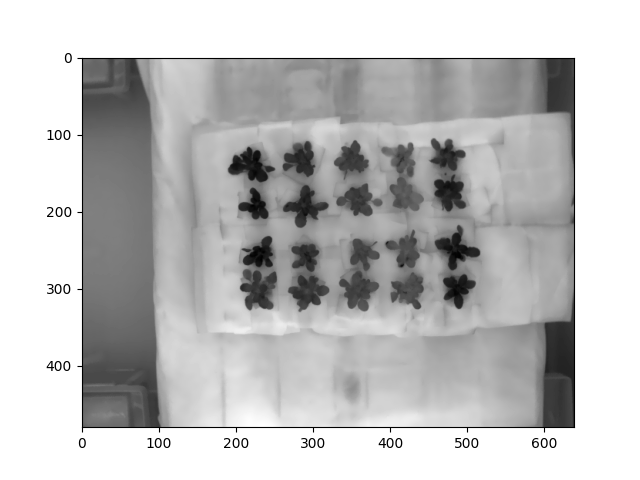

In [4]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
thermal_data, path, filename = pcv.readimage(filename=args.image1, mode='csv')

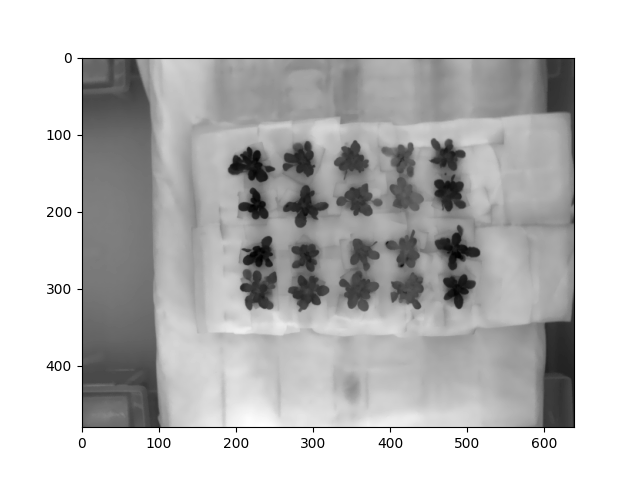

In [5]:
# Rescale the thermal data to a colorspace with range 0-255 rather than raw data 
    
# Inputs:
#   gray_img - Grayscale image data 
#   min_value - New minimum value for range of interest. default = 0
#   max_value - New maximum value for range of interest. default = 255
scaled_thermal_img = pcv.transform.rescale(gray_img=thermal_data)

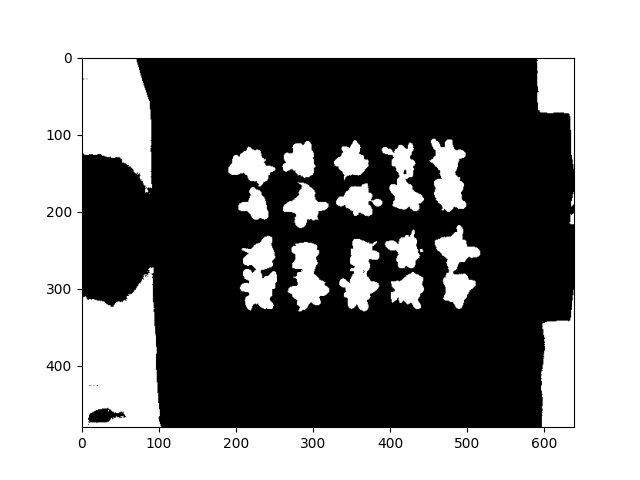

In [7]:
# Threshold the thermal data to make a binary mask
    
bin_mask = pcv.threshold.binary(gray_img=scaled_thermal_img, threshold=115, object_type='dark')

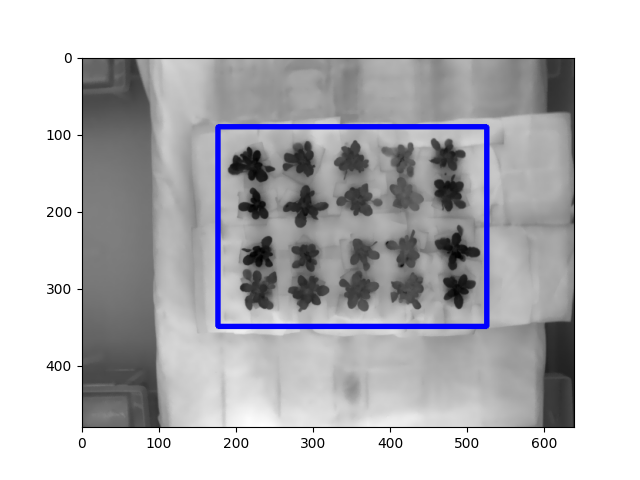

In [9]:
# Define the region of interest (ROI) 

roi = pcv.roi.rectangle(img=scaled_thermal_img, x=176, y=90, h=260, w=350)

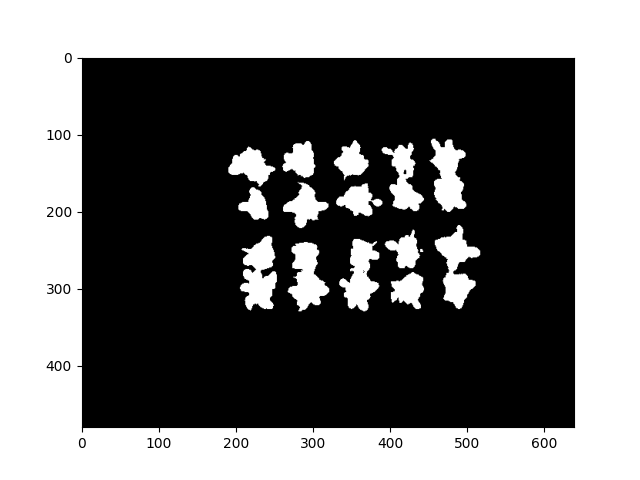

In [10]:
# Filter the binary mask based on region 

mask = pcv.roi.filter(mask=bin_mask, roi=roi,
                      roi_type="partial")

In [23]:
##### Analysis #####

# Analyze thermal data 


analysis_img = pcv.analyze.thermal(thermal_img=thermal_data, labeled_mask=mask,n_labels=1,
                                   bins=100, label="default")


alt.FacetChart(...)

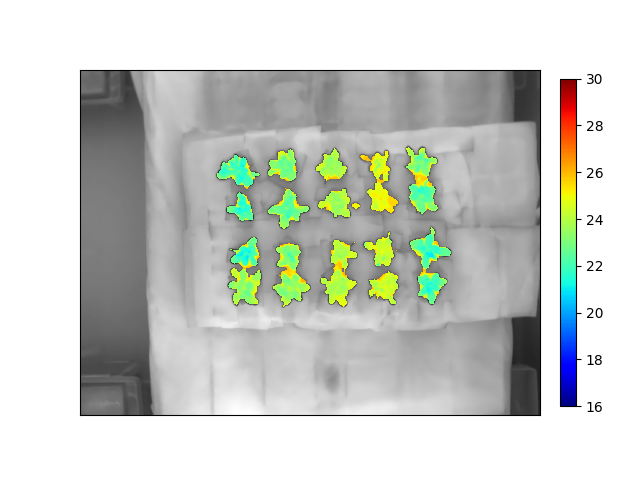

In [25]:
# Pseudocolor the thermal data 

pseudo_img = pcv.visualize.pseudocolor(gray_img = thermal_data, mask=mask, cmap='jet', 
                                       min_value=16, max_value=30)

In [ ]:
# Write thermal data to results file

pcv.outputs.save_results(filename=args.result)

In [26]:
pcv.print_image(img=pseudo_img, filename="tutorial_card.png")

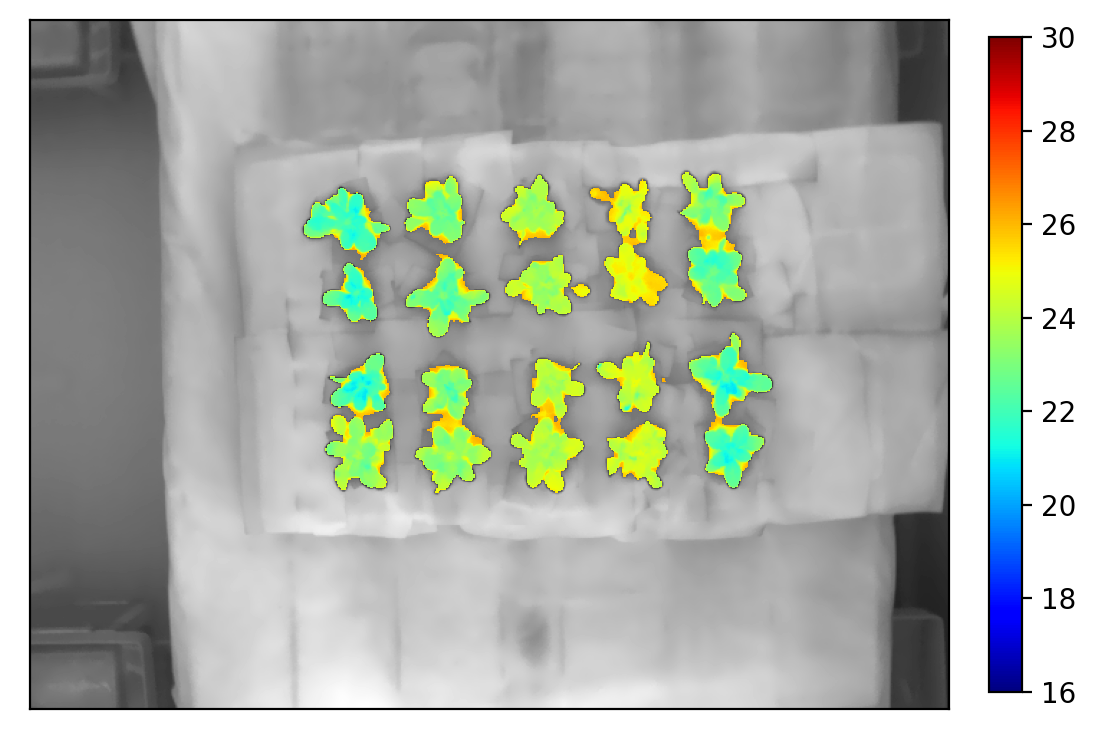

In [27]:
pseudo_img